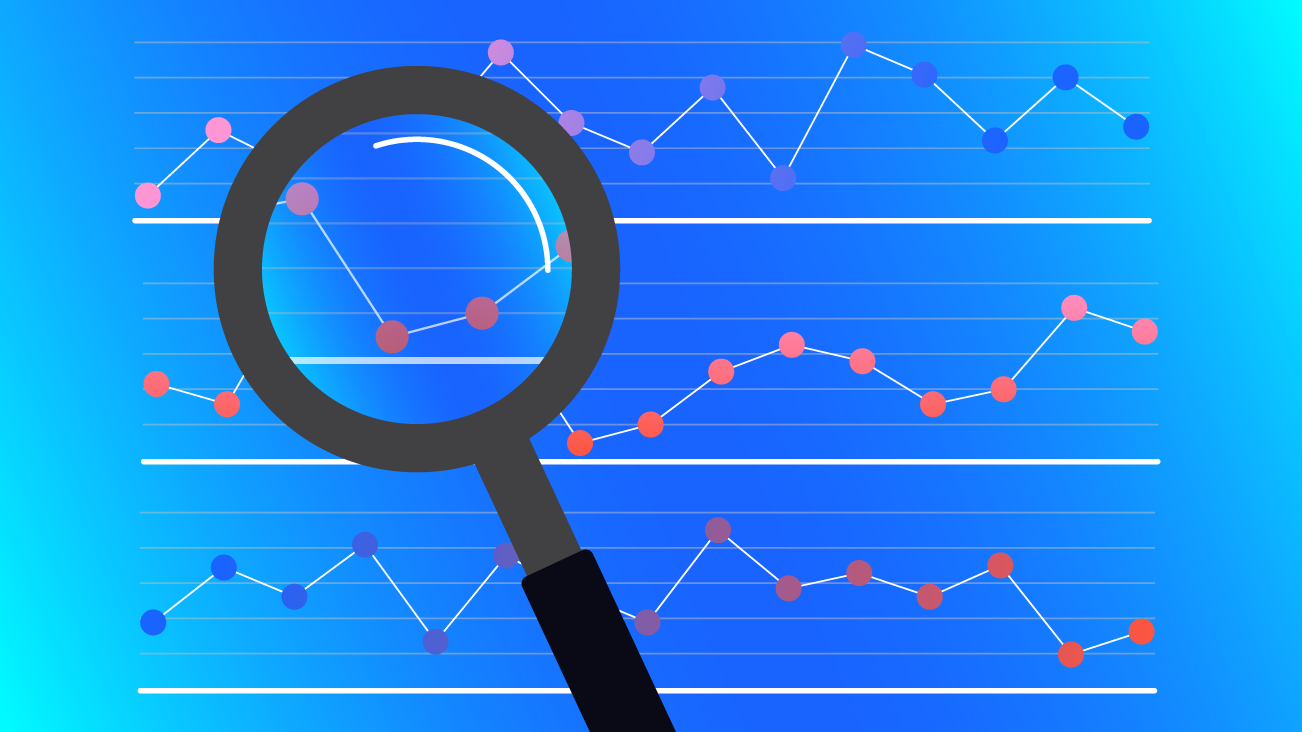
<center><strong><h1>TIME SERIES</h1><p>
    
It is data consisting of observation units ordered by time. It could be weather data, stock market data. In other words, it is the data consisting of observation values ordered according to time.</p></strong></center>

In the next notebook, Statistical Methods is explained. In here, the terminology will be explained, for checking Statistical Methods Tutorial:

https://www.kaggle.com/code/furkannakdagg/time-series-statistical-methods-tutorial


There are 4 structural concepts we need to know:

<h3>1. Stationary</h3>
The statistical properties of the series do not change over time. In other words, if the mean, variance and covariance of a time series remain constant over time, the series is said to be stationary.<br><br>
Suppose we take different periods in a time series. The fact that their properties do not change over time is that they are close to each other since the averages/standard deviations of the periods are taken. We are not interested in small differences, we are interested in statistical differences.
<br><br>

**Why is stationary significant?:**
Theoretically, there is an interpretation that the structure of the time series will be more predictable if it is at a certain stationarity, that is, in a certain pattern. In other words, the next step of a movement that shows a certain structure is also predictable. Therefore, there is usually an expectation: Is the time series stationary? There is an expectation that we can make predictions more easily if it is stationary. Because of this expectation, the first concept we focus on is the concept of stationary. To capture this, we can see this by looking at the time series image instead of statistical tests.

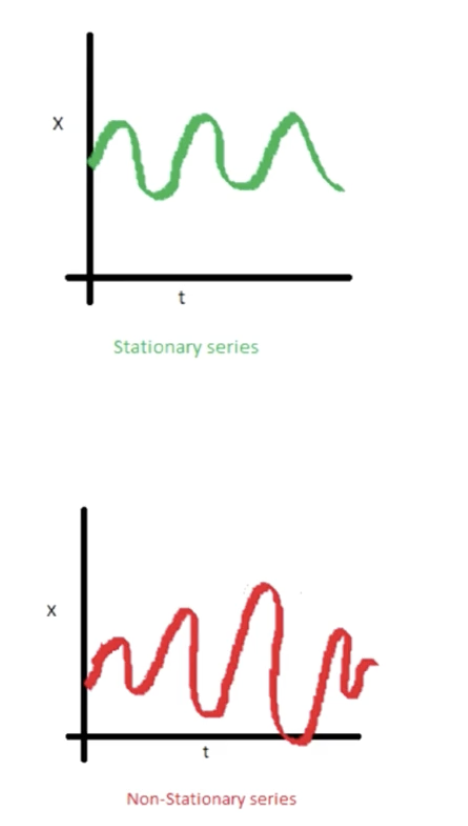

<h3>2. Trend</h3>
It is the structure of the long-term increase or decrease of a time series. If there is a trend, it is very unlikely that the series will be stationary because the statistics of the periods (mean, standard deviation, etc.) will change in an increasing or decreasing trend.

<h3>3. Seasonality</h3> 
Seasonality is when a time series repeats a certain behavior at certain intervals.


<h3>4. Cycle</h3> 
It contains repetitive patterns similar to seasonality and these two issues can be confused with each other. Seasonality can be mapped to specific time periods. It overlaps with structures such as day, week, year, season. For example, markets do more business on weekends or a product gets more attention in winter, etc.
The cyclicity takes place in a longer time, in a more uncertain structure, in a way that does not overlap with structures such as day, week, year, season. It occurs mostly for structural reasons, with cyclical changes. For example, it is shaped by the speeches of some people from the business world and the speeches of politicians. Although this is not completely seasonal, it occurs in a certain period, but the period in which it will occur is not clear.
<br>

---

**Understanding the Nature of Time Series Models:** We have seen the basic structures of time series above. The assumption underlying the time series: The value of the time series in a period t is most affected by its value in the previous time period (t-1). For example, today is Sunday, the value preceding it most explains the value of the time series on Sunday. Based on this assumption, averaging the previous observation units can be an interpretation.
In other words, it is reasonable to carry a seasonality information from the past, it can be concluded that it is reasonable for us to focus on past values.

**Moving Average:** The future value of a time series is the average of its k previous values.
Moving average trading is generally used in practice not for forecasting, but for capturing/observing a trend. However, while deriving features within the scope of machine learning, we are still generating features based on moving averages.

**Weighted Average:** Similar to a moving average. It carries the idea of giving more weight to later observations.

**NOTE: Although the forecast results are better in the moving average, the moving average and weighted average methods cannot catch the trend (the trend in the data in the period I want to forecast, not in the general chart), they are more successful in stationarity.
In this case, it would make more sense to look at the percentages of change between the values and take their average or weighted average by weighting them.**

**We will use more advanced methods for forecasting, not moving average and weighted average.**

---

<center><h2>Smoothing Methods</h2></center>
<h3>1. Single Exponential Smoothing(Simple Exponential Smoothing - SES)</h3>
It is successful only in stationary series. There should be no trends and seasonality. It can model the level(Level can be thought of as the average of the series.). The effects of the past are weighted on the assumption that "the future is more related to the recent past". SES is suitable for univariate time series without trend and seasonality, it is successful in stationary series.
   
<h3>2. Double Exponential Smoothing(DES)</h3>
The basic approach is the same. In addition to SES, the trend is also taken into account. It is suitable for univariate time series with and without seasonality.

<h3>3.Triple Exponential Smoothing(TES - Holt-Winters):</h3>
It is the most advanced smoothing method. This method makes predictions by evaluating the effects of level, trend and seasonality dynamically. It can be used in univariate series with trend and/or seasonality.


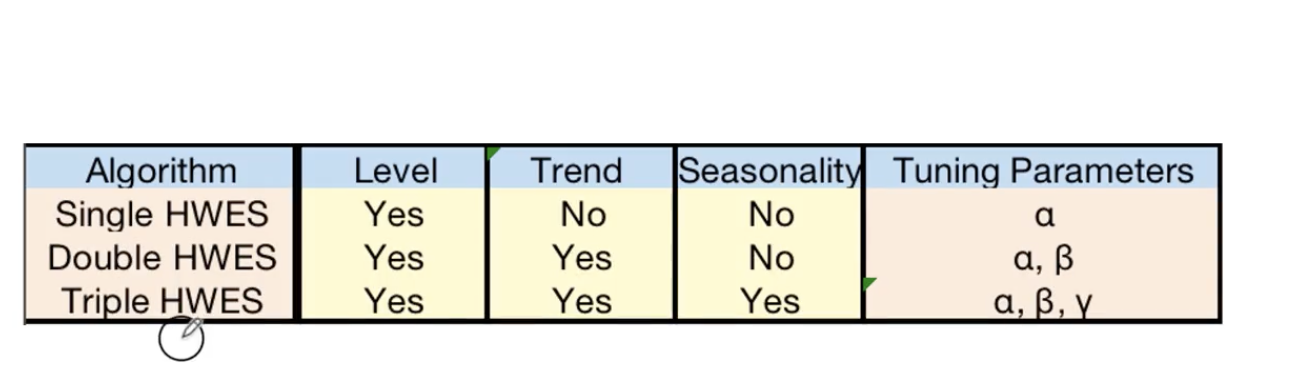


Let's implement these methods on a dataset.

# Story of Dataset and EDA

In [1]:
# Import Libraries
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose  # to split the time series into components
import statsmodels.tsa.api as smt

warnings.filterwarnings('ignore')

A dataset from the sm module will be used. It shows the atmospheric C02 in Hawaii according to time. 
* Name: Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.
* Period of Record: March 1958 - December 2001

In [2]:
data = sm.datasets.co2.load_pandas()  # A dataset from the sm module
y = data.data  # target varible

In [3]:
y

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


The dates are given in index and CO2's are given according to dates. <ins>BY LOOKING AT THE DATES, WE CAN SAY THAT THIS DATASET IS WEEKLY!<br>
WHEN LOOKING AT CO2, WE SHOULD CONVERT IT FROM WEEKLY TO MONTHLY BEFORE IT MORE SIGNIFICANT TO LOOK AT THE MONTHLY!</ins>

In [4]:
# MS => month
y = y['co2'].resample('MS').mean()

In [5]:
y.isnull().sum()

5

There are missing values. Missing values in time series are mean, median cannot be filled. It can be filled with values before or after it. It can also be filled by averaging the values before and after it. Since the data is the only variable and we are looking at it as a before and after, it can be filled in such a way that the average of the previous and next value is used instead of averaging the entire data set. Because if there is a trend or seasonality in the series, it is clear that the assignment here may be wrong.

In [6]:
# fill a missing values with the next value
y = y.fillna(y.bfill())

In [7]:
y.isnull().sum()

0

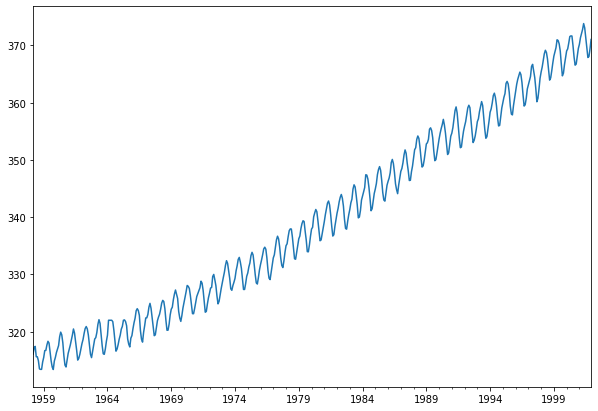

In [8]:
# visualize the series and look at its general structure
y.plot(figsize=(10, 7))
plt.show()

There is a trend in the series, it is not stationary because its statistical properties change with time, there is also seasonality.

We will move on to the modeling process, but **ATTENTION**:

In classical statistical methods, instead of model validation methods such as train-test separation and CV method, the model is built on all data, the success of the model is tested on all data, and the necessary internal or external parameters are found with efforts to be made on all data.

### Hold-out

Hold-out method is used because models tend to memorize and overfit, whether they are time series or deep learning methods when training models. Therefore, we should use some methods to prevent this and to evaluate the errors more accurately and to validate the models. That's why we split the dataset as train-test.

In [9]:
# let the train set be the part from 1958 to the end of 1997
train = y[:'1997-12-01']
print("Lenght of train", len(train))  # 478 months

# test set from the first month of 1998 to the end of 2001.
test = y['1998-01-01':]
print("Lenght of test", len(test))  # 48 months

Lenght of train 478
Lenght of test 48


**QUESTION:** We were using CV methods in ML methods, isn't CV more efficient?
* **ANSWER:** The data we have is time series data. When we break it into pieces and test it, trends break, seasonality scatter. Therefore, this process will not be healthy. This process can be done, but time periods should be considered.

### Time Series-Structural Analysis

When we look at the data set we have, we said that it is not stationary. To verify this statistically, Dickey-Fuller test can be used.

In [10]:
# Stationary Test (Dickey-Fuller Test)
def is_stationary(y):

    # "HO: Non-stationary"  => the series is not stationary
    # "H1: Stationary"  => the series is stationary

    p_value = sm.tsa.stattools.adfuller(y)[1]
    if p_value < 0.05:
        print(F"Result: Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")
    else:
        print(F"Result: Non-Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")

is_stationary(y) 

Result: Non-Stationary (H0: non-stationary, p-value: 0.999)


Non-Stationary since p>0.05, H0 cannot be denied. 

In order to detailed info to interpretaiton of a test, check my another notebook:<br>
https://www.kaggle.com/code/furkannakdagg/ab-testi-ile-bidding-y-ntemleri-kar-la-t-rmas

### Visualization of Time Series Components and Stationarity Test

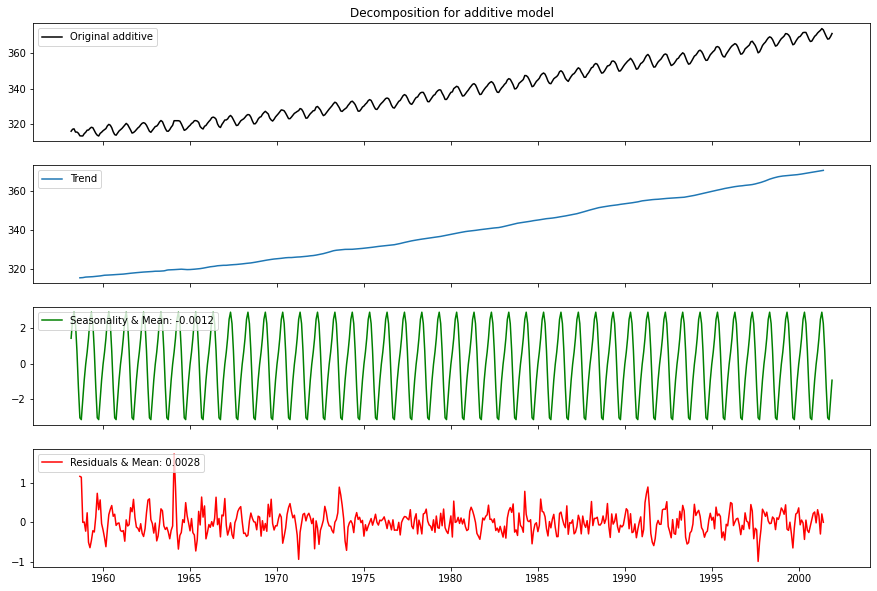

Result: Non-Stationary (H0: non-stationary, p-value: 0.999)


In [11]:
def ts_decompose(y, model="additive", stationary=False):  # model => additive or multiplicative
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show(block=True)

    if stationary:
        is_stationary(y)

ts_decompose(y, stationary=True)

Top to bottom:
* Level
* Trend
* Seasonality
* Residuals => We expect the mean of the residuals to be 0, here also shaped around 0

So the series has seasonality and trend. In other words, we have the opportunity to observe the components that we look at in a single graphic in a more detailed way.

# SES (Single Exponential Smoothing)

SES = Level (Unsuccessful if Trend and Seasonality).

There is an argument named as "smoothing_level". The SimpleExpSmoothing method would not give an error if we did not enter the smoothing_level. We're entering it now, because in the future beta, gamma arguments will come. When we enter them, method will understand which SES, DES or TES method we are using. So we might not have entered smoothing_level here, we did it to raise awareness.

In [12]:
# build SES model
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.5)

In [13]:
# to predict, .forecast() is used in here
# forecast(how many steps/periods will you predict?)
y_pred = ses_model.forecast(48)  # since our test set includes 48 months, enter 48

In [14]:
y_pred

1998-01-01    363.057044
1998-02-01    363.057044
1998-03-01    363.057044
1998-04-01    363.057044
1998-05-01    363.057044
1998-06-01    363.057044
1998-07-01    363.057044
1998-08-01    363.057044
1998-09-01    363.057044
1998-10-01    363.057044
1998-11-01    363.057044
1998-12-01    363.057044
1999-01-01    363.057044
1999-02-01    363.057044
1999-03-01    363.057044
1999-04-01    363.057044
1999-05-01    363.057044
1999-06-01    363.057044
1999-07-01    363.057044
1999-08-01    363.057044
1999-09-01    363.057044
1999-10-01    363.057044
1999-11-01    363.057044
1999-12-01    363.057044
2000-01-01    363.057044
2000-02-01    363.057044
2000-03-01    363.057044
2000-04-01    363.057044
2000-05-01    363.057044
2000-06-01    363.057044
2000-07-01    363.057044
2000-08-01    363.057044
2000-09-01    363.057044
2000-10-01    363.057044
2000-11-01    363.057044
2000-12-01    363.057044
2001-01-01    363.057044
2001-02-01    363.057044
2001-03-01    363.057044
2001-04-01    363.057044


**QUESTION:** There are duplicate values in y_pred, why?
* **ANSWER:** Because there is trend, seasonality in data, and SES is not so good when it comes to trend and seasonality. Therefore, the estimates are not that accurate.

In [15]:
# MSE, RMSE can be used, as well
mean_absolute_error(test, y_pred)

5.706393369643809

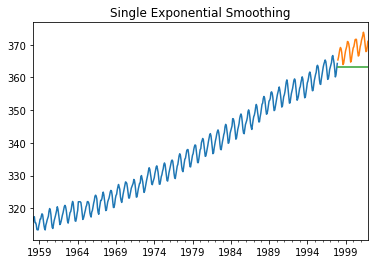

In [16]:
# visualize
train.plot(title="Single Exponential Smoothing")  # visualize train set
test.plot()  # visualize test set
y_pred.plot()  # visualize predicted values
plt.show()

* Blue: Train 
* Orange: Test
* Green: Predicted

Here we can see how many unsuccessful predictions we made.

We may want to take a closer look at the dataset, we may want to look beyond 1985 of the train set. We do the same process as above, just zooming in a bit to observe.

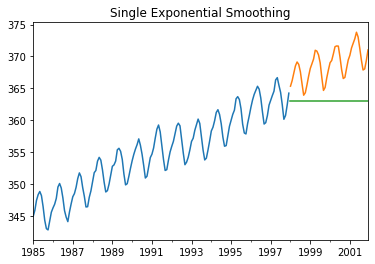

In [17]:
train["1985":].plot(title="Single Exponential Smoothing")
test.plot()
y_pred.plot()
plt.show()

## Function for Visualization

Since we will use the visualization often later, let's make both the graph and the MAE functional.

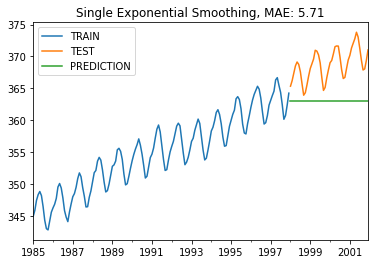

In [18]:
def plot_co2(train, test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)
    train["1985":].plot(legend=True, label="TRAIN", title=f"{title}, MAE: {round(mae,2)}")
    test.plot(legend=True, label="TEST", figsize=(6, 4))
    y_pred.plot(legend=True, label="PREDICTION")
    plt.show()

plot_co2(train, test, y_pred, "Single Exponential Smoothing")

## Hyperparameter Tuning for SES

In [19]:
ses_model.params  # smoothing_level=0.5 given by us

{'smoothing_level': 0.5,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 316.4419309772571,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [20]:
def ses_optimizer(train, alphas, step=48):  # step for length of test set

    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae

        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

alphas = np.arange(0.8, 1, 0.01)

We generate alphas with 0.01 steps from 0.8 to 1. If we wish, we can write from 0.1 to 1 in increments of 0.1, but SES is already a weak model. We know that closer to the historical real values will yield more successful results, so we start from 0.8.

In [21]:
ses_optimizer(train, alphas)

alpha: 0.8 mae: 4.953
alpha: 0.81 mae: 4.9282
alpha: 0.82 mae: 4.9035
alpha: 0.83 mae: 4.8792
alpha: 0.84 mae: 4.8551
alpha: 0.85 mae: 4.8316
alpha: 0.86 mae: 4.8091
alpha: 0.87 mae: 4.7869
alpha: 0.88 mae: 4.765
alpha: 0.89 mae: 4.7434
alpha: 0.9 mae: 4.7221
alpha: 0.91 mae: 4.7012
alpha: 0.92 mae: 4.6805
alpha: 0.93 mae: 4.6602
alpha: 0.94 mae: 4.6402
alpha: 0.95 mae: 4.6205
alpha: 0.96 mae: 4.6012
alpha: 0.97 mae: 4.5822
alpha: 0.98 mae: 4.5634
alpha: 0.99 mae: 4.5451
best_alpha: 0.99 best_mae: 4.5451


(0.9900000000000002, 4.545056761011273)

In [22]:
best_alpha, best_mae = ses_optimizer(train, alphas) # save the results(return of func.)

alpha: 0.8 mae: 4.953
alpha: 0.81 mae: 4.9282
alpha: 0.82 mae: 4.9035
alpha: 0.83 mae: 4.8792
alpha: 0.84 mae: 4.8551
alpha: 0.85 mae: 4.8316
alpha: 0.86 mae: 4.8091
alpha: 0.87 mae: 4.7869
alpha: 0.88 mae: 4.765
alpha: 0.89 mae: 4.7434
alpha: 0.9 mae: 4.7221
alpha: 0.91 mae: 4.7012
alpha: 0.92 mae: 4.6805
alpha: 0.93 mae: 4.6602
alpha: 0.94 mae: 4.6402
alpha: 0.95 mae: 4.6205
alpha: 0.96 mae: 4.6012
alpha: 0.97 mae: 4.5822
alpha: 0.98 mae: 4.5634
alpha: 0.99 mae: 4.5451
best_alpha: 0.99 best_mae: 4.5451


In [23]:
best_alpha, best_mae

(0.9900000000000002, 4.545056761011273)

## Final SES Model

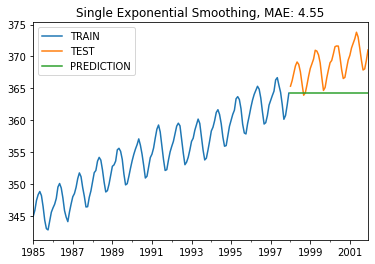

In [24]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(48)
# In fact, the error we will find here is also found in the above function. 
# We're posting here for awareness.

plot_co2(train, test, y_pred, "Single Exponential Smoothing")

# DES (Double Exponential Smoothing)

DES: Level (SES) + Trend

Some of the series can be multiplicative, some additive.
* y(t) = Level + Trend + Seasonality + Noise => Additive
* y(t) = Level * Trend * Seasonality * Noise => Multiplicative

In the multiplicative, the functional structure changes in a more dependent way. If the seasonality and residual components are independent from the trend, the series is additive. Seasonality and residual components are multiplicative if they are shaped according to the trend.

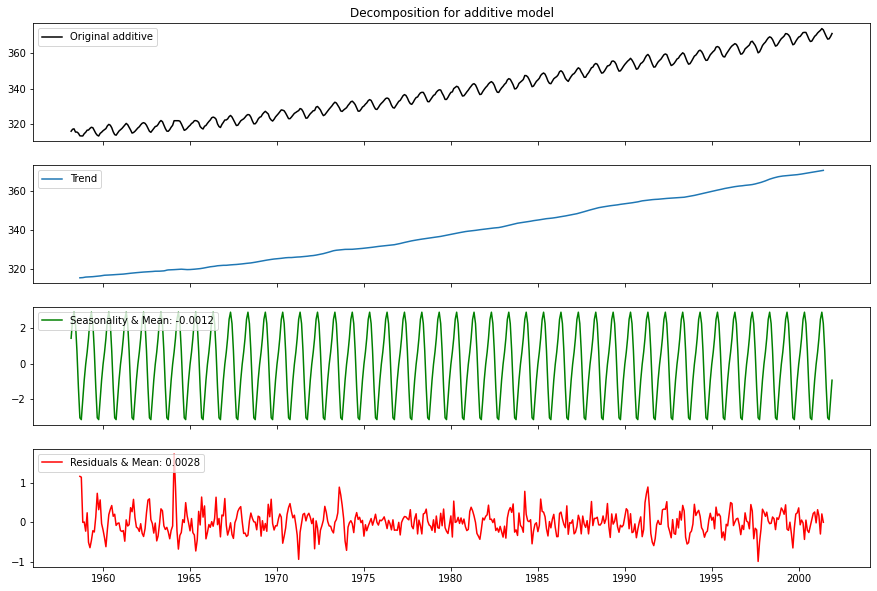

In [25]:
ts_decompose(y)

Seasonality and residuals are randomly scattered around 0. The trend did not take them up with it, so it cannot affect them. So this series is **additive.**

Normally we should build both models, we decide to use whichever has the lower error. Here, we examine the graph and say add directly, since residuals and seasonality are independent of the trend. Therefore, the argument is given as "add" directly. 

In [26]:
# build DES model
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=0.5,
                                                         smoothing_trend=0.5)

In [27]:
# prediction
y_pred = des_model.forecast(48)

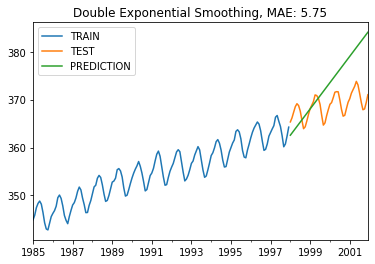

In [28]:
# plot the results
plot_co2(train, test, y_pred, "Double Exponential Smoothing") 

Although the result seems good, some unsuccessful estimations were obtained due to the lack of seasonality.

## Hyperparameter Optimization for DES

In [29]:
def des_optimizer(train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae

In [30]:
alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas)

alpha: 0.01 beta: 0.01 mae: 2.3849
alpha: 0.01 beta: 0.11 mae: 2.8294
alpha: 0.01 beta: 0.21 mae: 2.744
alpha: 0.01 beta: 0.31 mae: 2.1723
alpha: 0.01 beta: 0.41 mae: 2.8895
alpha: 0.01 beta: 0.51 mae: 2.49
alpha: 0.01 beta: 0.61 mae: 1.8196
alpha: 0.01 beta: 0.71 mae: 1.7411
alpha: 0.01 beta: 0.81 mae: 2.1932
alpha: 0.01 beta: 0.91 mae: 4.8521
alpha: 0.11 beta: 0.01 mae: 2.4334
alpha: 0.11 beta: 0.11 mae: 3.9118
alpha: 0.11 beta: 0.21 mae: 6.0908
alpha: 0.11 beta: 0.31 mae: 7.2434
alpha: 0.11 beta: 0.41 mae: 8.7305
alpha: 0.11 beta: 0.51 mae: 10.3166
alpha: 0.11 beta: 0.61 mae: 12.0066
alpha: 0.11 beta: 0.71 mae: 13.9772
alpha: 0.11 beta: 0.81 mae: 16.4873
alpha: 0.11 beta: 0.91 mae: 19.655
alpha: 0.21 beta: 0.01 mae: 2.8218
alpha: 0.21 beta: 0.11 mae: 5.7217
alpha: 0.21 beta: 0.21 mae: 8.6538
alpha: 0.21 beta: 0.31 mae: 11.7598
alpha: 0.21 beta: 0.41 mae: 15.5277
alpha: 0.21 beta: 0.51 mae: 20.1474
alpha: 0.21 beta: 0.61 mae: 25.5273
alpha: 0.21 beta: 0.71 mae: 31.2781
alpha: 0.21 be

## Final DES Model

In [31]:
final_des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                               smoothing_slope=best_beta)

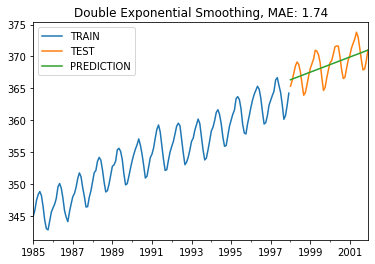

In [32]:
y_pred = final_des_model.forecast(48)

plot_co2(train, test, y_pred, "Double Exponential Smoothing")

MAE dramatically decreased after hyperparameter tuning. The result of DES is much better than SES.

# TES (Triple Exponential Smoothing - Holt-Winters)

TES = SES + DES + Seasonality

As we mentioned above, when we enter trend and seasonality as parameters, the method understands that we will use TES.

In [33]:
# build TES model
tes_model = ExponentialSmoothing(train,
                                 trend="add",
                                 seasonal="add",
                                 seasonal_periods=12).fit(smoothing_level=0.5,
                                                          smoothing_slope=0.5,
                                                          smoothing_seasonal=0.5)

seasonality period = 12, we should observe when we look at the graph => we enter it as 12 because the years in the data set are shaped by months. In other words, when we enter 12, we give the information that there is a seasonal pattern when the determined monthly period repeats 1 in 12.

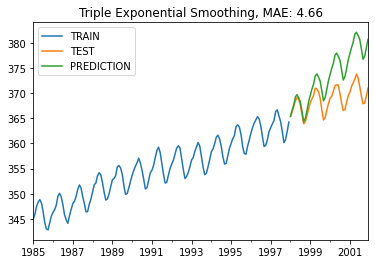

In [34]:
# prediction and plot
y_pred = tes_model.forecast(48)
plot_co2(train, test, y_pred, "Triple Exponential Smoothing")

## Hyperparameter Optimization for TES

In [35]:
alphas = betas = gammas = np.arange(0.20, 1, 0.10)

Normally we have to write 3 loops in the function since we have 3 values. We use itertools for code readability. As output, all possible values of 3 parameters in tuple form have been combined. If we choose 0th, 1st element of abg instead of 3 loops, then we go through all combinations.

In [36]:
abg = list(itertools.product(alphas, betas, gammas))
abg[0:20] # observe abg that includes all combinations

[(0.2, 0.2, 0.2),
 (0.2, 0.2, 0.30000000000000004),
 (0.2, 0.2, 0.4000000000000001),
 (0.2, 0.2, 0.5000000000000001),
 (0.2, 0.2, 0.6000000000000001),
 (0.2, 0.2, 0.7000000000000002),
 (0.2, 0.2, 0.8000000000000003),
 (0.2, 0.2, 0.9000000000000001),
 (0.2, 0.30000000000000004, 0.2),
 (0.2, 0.30000000000000004, 0.30000000000000004),
 (0.2, 0.30000000000000004, 0.4000000000000001),
 (0.2, 0.30000000000000004, 0.5000000000000001),
 (0.2, 0.30000000000000004, 0.6000000000000001),
 (0.2, 0.30000000000000004, 0.7000000000000002),
 (0.2, 0.30000000000000004, 0.8000000000000003),
 (0.2, 0.30000000000000004, 0.9000000000000001),
 (0.2, 0.4000000000000001, 0.2),
 (0.2, 0.4000000000000001, 0.30000000000000004),
 (0.2, 0.4000000000000001, 0.4000000000000001),
 (0.2, 0.4000000000000001, 0.5000000000000001)]

In [37]:
abg[len(abg)-10:]

[(0.9000000000000001, 0.8000000000000003, 0.8000000000000003),
 (0.9000000000000001, 0.8000000000000003, 0.9000000000000001),
 (0.9000000000000001, 0.9000000000000001, 0.2),
 (0.9000000000000001, 0.9000000000000001, 0.30000000000000004),
 (0.9000000000000001, 0.9000000000000001, 0.4000000000000001),
 (0.9000000000000001, 0.9000000000000001, 0.5000000000000001),
 (0.9000000000000001, 0.9000000000000001, 0.6000000000000001),
 (0.9000000000000001, 0.9000000000000001, 0.7000000000000002),
 (0.9000000000000001, 0.9000000000000001, 0.8000000000000003),
 (0.9000000000000001, 0.9000000000000001, 0.9000000000000001)]

**ATTENTION:**

Since there is a long report, the report is commented on function, the only result is displayed. If you will use that function, the line can be uncommented. 

In [38]:
def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        # her satırın 0., 1., 2. elemanlarını seç ve model kur
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        # print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

In [39]:
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg)

best_alpha: 0.8 best_beta: 0.5 best_gamma: 0.7 best_mae: 0.606


## Final TES Model

The argument given above smoothing_slope is the same with smoothing_trend. smoothing_trend is used here to show that they are the same. 

In [40]:
final_tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_trend=best_beta, smoothing_seasonal=best_gamma)

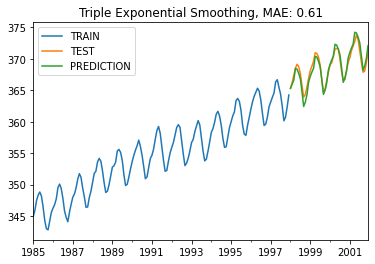

In [41]:
# prediction and plot
y_pred = final_tes_model.forecast(48)

plot_co2(train, test, y_pred, "Triple Exponential Smoothing")

The best MAE is obtained with TES.

**NOTE:** If the data set had much data, it could be divided into train-validation-test sets according to certain time periods, then, set up a model with the train set, optimized the hyperparameters with the validation set, and tested with the test set. This is an interpretation and evaluation. We need to assess whether there will be a significant difference. Because it sees the test set we made and adjusts the hyperparameter, it may raise a question such as whether there is a leakage here.